# import packages

In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# read data

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data = data.applymap(str) # change all values to string

# methods

## prepare labels

In [3]:
# takes as input a dataframe and the specific category of labels
# removes the white space, igonores empty labels, and split multiple labels that are in one cell
# returns a dataframe and list of all labels, and the total number of labels in this category

def prepare_labels(df_input, category):

    list_labels = []

    for label in df_input[category]:
        label = label.replace(" ", "") # remove whitespace
        if label == 'nan': # ignore empty labels
            continue
        elif ',' in label: # split labels seperated by comma's
            chunks = label.split(',')
            for chunk in chunks:
                list_labels.append(chunk)
        else:
            list_labels.append(label)
            
    n_labels = len(list_labels)
    df_labels = pd.DataFrame(list_labels, columns=[category])
     
    return df_labels, list_labels, n_labels

## make histogram

In [4]:
# takes as input a dictionary (labels + frequency) and the category name
# then a histogram is constructed and saved as a png

def make_hist(dict_labels, category_name):   

    # make dataframe
    df_labels = pd.DataFrame(list(dict_labels.items()))
    df_labels.columns = [category_name,'Frequency']
    
    # sort frequency descending
    df_labels = df_labels.sort_values(['Frequency'],ascending=False).reset_index(drop=True)
    
    # rotate label names on x-axis
    plt.xticks(rotation=90)
    
    # plot
    ax = sns.barplot(x=category_name, y="Frequency", data=df_labels, color="#636363")
    plt.ylim(0, 224)
    plt.savefig("figures/" + category_name +".png",bbox_inches='tight')

## plot all categories

In [5]:
# prepares the data and plots the histogram for each category of a dataframe

def plot_all(df_input, df_name):
    
    ### GOAL

    # prepare data
    category = 'goal'
    df_labels, list_labels, n_labels = prepare_labels(df_input, category)
    # count frequencies
    dict_labels = ({'Reduce energy':list_labels.count('reduce_energy'), 'Monitor':list_labels.count('monitor'), 'Increase EE':list_labels.count('increase_EE'), 'Reduce costs':list_labels.count('reduce_cost'), 'Renewable':list_labels.count('optimize_renewable')})
    # plot
    category_name = df_name + ": Energy related goal"  
    make_hist(dict_labels, category_name)

    ### STRATEGY

    # prepare data
    category = 'strategy'
    df_labels, list_labels, n_labels = prepare_labels(df_input, category)
    # count frequencies
    dict_labels = ({'VM consolidation':list_labels.count('VM_consolidation'), 'Resource':list_labels.count('resource_management'), 'Predict':list_labels.count('predict'), 'Model':list_labels.count('model'), 'VM placement':list_labels.count('VM_placement'), 'VM selection':list_labels.count('VM_selection'), 'Network':list_labels.count('network_optimization'), 'VM migration':list_labels.count('VM_migration'), 'Measure':list_labels.count('measure'), 'Container':list_labels.count('containerization'), 'Other':list_labels.count('other')})
    # plot
    category_name = df_name + ": Strategy type"
    make_hist(dict_labels, category_name)

    ### ALGORITMS

    # prepare data
    category = 'algorithms'
    df_labels, list_labels, n_labels = prepare_labels(df_input, category)
    # remove VM and container from components
    df_labels = df_labels[df_labels.algorithms != "round_robin"]
    # count frequencies
    dict_labels = ({'Nature':list_labels.count('nature'), 'ML':list_labels.count('ML'), 'Fit':list_labels.count('bin'), 'LP':list_labels.count('LP'), 'Other':list_labels.count('other'), 'GP':list_labels.count('GP'), 'Fuzzy':list_labels.count('fuzzy'), 'DVFS':list_labels.count('DVFS')})
    # plot
    category_name = df_name + ": Algorithms and techniques"
    make_hist(dict_labels, category_name)

    ### SOFTWARE-DRIVEN

    # prepare data
    category = 'software-driven'
    df_labels, list_labels, n_labels = prepare_labels(df_input, category)
    # count frequencies
    dict_labels = ({'Completely':list_labels.count('completely_consists_of'), 'Depends':list_labels.count('depends_on'), 'Partly':list_labels.count('partly_consists_of')})
    # plot
    category_name = df_name + ": Software-driven" 
    make_hist(dict_labels, category_name)

    ### ENERGY METRICS

    # prepare data
    category = 'energy_metrics'
    df_labels, list_labels, n_labels = prepare_labels(df_input, category)
    # count frequencies
    dict_labels = ({'Power consumption':list_labels.count('power_cons'), 'Energy consumption':list_labels.count('energy_cons'), 'Renewable':list_labels.count('renewable'), 'Energy efficiency':list_labels.count('EE'), 'Energy & SLA':list_labels.count('energy_SLA'), 'Supporting & ICT':list_labels.count('supp_ICT'), 'Other':list_labels.count('other')})
    # plot
    category_name = df_name + ": Energy related metrics"  
    make_hist(dict_labels, category_name)

    # OTHER METRICS

    # prepare data
    category = 'other_metrics'
    df_labels, list_labels, n_labels = prepare_labels(df_input, category)
    # count frequencies
    dict_labels = ({'Resource':list_labels.count('resource'), 'VM':list_labels.count('VM'), 'Time':list_labels.count('time'), 'Cost':list_labels.count('cost'), 'Network':list_labels.count('network'), 'SLA':list_labels.count('SLA'), 'Algorithm':list_labels.count('algorithm'), 'Other':list_labels.count('other'), 'PM':list_labels.count('PM'), 'Workload':list_labels.count('workload'), 'Supporting':list_labels.count('support'), 'Footprint':list_labels.count('footprint')})
    # plot
    category_name = df_name + ": Other metrics" 
    make_hist(dict_labels, category_name)

    ### EVALUATION

    # prepare data
    category = 'evaluation'
    df_labels, list_labels, n_labels = prepare_labels(df_input, category)
    # count frequencies
    dict_labels = ({'Other':list_labels.count('other'), 'Empirical':list_labels.count('empirical'), 'Simulated':list_labels.count('simulated'), 'Theoretical':list_labels.count('theoretical')})
    # plot
    category_name = df_name + ": Evaluation" 
    make_hist(dict_labels, category_name)

    # DC COMPONENT

    # prepare data
    category = 'component'
    df_labels, list_labels, n_labels = prepare_labels(df_input, category)
    # remove VM and container from components
    df_labels = df_labels[df_labels.component != "VM"]
    df_labels = df_labels[df_labels.component != "container"]
    # count frequencies
    dict_labels = ({'Server':list_labels.count('server'), 'CPU':list_labels.count('CPU'), 'Storage':list_labels.count('storage'), 'Memory':list_labels.count('memory'), 'DC':list_labels.count('DC'), 'Network':list_labels.count('network')})
    # plot
    category_name = df_name + ": Data center component"
    make_hist(dict_labels, category_name)

    ### DC TYPE    

    # prepare data
    category = 'dc_type'
    df_labels, list_labels, n_labels = prepare_labels(df_input, category)
    # count frequencies
    dict_labels = ({'Cloud':list_labels.count('cloud'), 'Geo-distributed':list_labels.count('geo-distributed'), 'Renewable':list_labels.count('renewable'), 'Heterogeneous':list_labels.count('heterogeneous'), 'Large-scale':list_labels.count('large'), 'Homogeneous':list_labels.count('homogeneous'), 'Other':list_labels.count('other'), 'Small-scale':list_labels.count('small'), 'Medium-scale':list_labels.count('medium'), 'Virtual':list_labels.count('vDC')})
    # plot
    category_name = df_name + ": Data center type"
    make_hist(dict_labels, category_name)

# make plots for all data

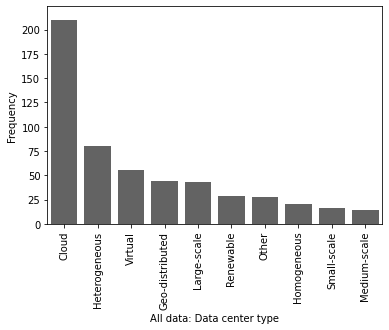

In [6]:
plot_all(data, "All data")

# merged strategies

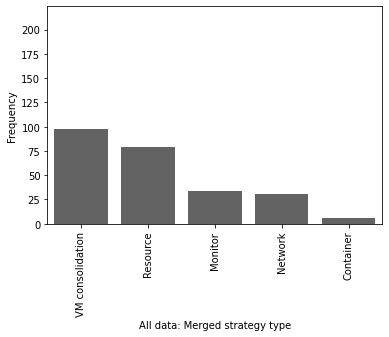

In [7]:
# prepare data
category = 'strategy'
df_labels, list_labels, n_labels = prepare_labels(data,category)
# count frequencies
dict_labels = ({'VM consolidation':list_labels.count('VM_consolidation'), 'Resource':list_labels.count('resource_management'), 'Monitor':list_labels.count('predict')+list_labels.count('model')+list_labels.count('measure'), 'Network':list_labels.count('network_optimization'), 'Container':list_labels.count('containerization')})
# plot
category_name = "All data: Merged strategy type" 
make_hist(dict_labels, category_name)

# make plots for all merged strategy types

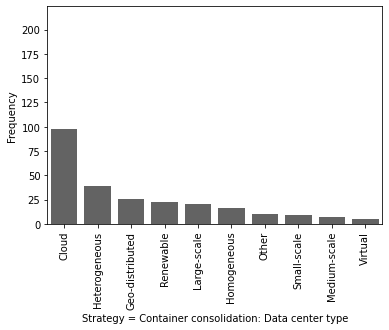

In [8]:
# VM CONSOLIDATION
df_vm = data[data['strategy'].str.contains("VM_consolidation")]
plot_all(df_vm, "Strategy = VM consolidation")

# RESOURCE MANAGEMENT
df_resource = data[data['strategy'].str.contains("resource_management")]
plot_all(df_resource, "Strategy = Resource management")

# MONITOR
# merge predict, model and measure
monitor_labels = ["model","predict","measure"]
pattern = '|'.join(r"\b{}\b".format(x) for x in monitor_labels)
df_monitor = data[data['strategy'].str.contains(pattern)]
plot_all(df_monitor, "Strategy = Monitor")

# NETWORK OPTIMIZATION
df_network = data[data['strategy'].str.contains("network_optimization")]
plot_all(df_network, "Strategy = Network optimization")

# CONTAINER CONSOLIDATION
df_container = data[data['strategy'].str.contains("containerization")]
plot_all(df_container, "Strategy = Container consolidation")